In [1]:
import xarray as xr
import xesmf as xe
import matplotlib.pyplot as plt
import numpy as np

src_grid = 'debug_grid_data/livneh_NAmerExt_15Oct2014.198610.nc'

dest_grid = 'dest/id_wrf_narr_d01.nc'


In [2]:
ds_src = xr.open_dataset(src_grid)
ds_src

<xarray.Dataset>
Dimensions:  (lon: 928, lat: 614, time: 31)
Coordinates:
  * lon      (lon) float64 -125.0 -124.9 -124.8 -124.8 ... -67.16 -67.09 -67.03
  * lat      (lat) float64 14.66 14.72 14.78 14.84 ... 52.78 52.84 52.91 52.97
  * time     (time) datetime64[ns] 1986-10-01 1986-10-02 ... 1986-10-31
Data variables:
    Prec     (time, lat, lon) float32 ...
    Tmax     (time, lat, lon) float32 ...
    Tmin     (time, lat, lon) float32 ...
    wind     (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.6.4 (http://c...
    Conventions:               CF-1.4
    history:                   Sat Oct 11 08:19:20 2014: cdo ifthenelse /Volu...
    nco_openmp_thread_number:  1
    NCO:                       4.4.5
    CDO:                       Climate Data Operators version 1.6.4 (http://c...

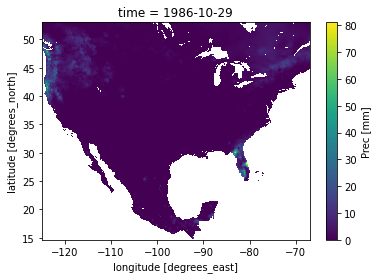

In [3]:
ds_src['Prec'][28].plot()

In [4]:
new_lon, new_lat = np.meshgrid(ds_src['lon'],ds_src['lat'])

ds_src = ds_src.rename({'lon': 'west_east', 'lat': 'south_north'})

ds_src = ds_src.assign_coords({
    'lat': (['south_north','west_east'], new_lat),
    'lon': (['south_north','west_east'], new_lon)
})
ds_src

<xarray.Dataset>
Dimensions:      (west_east: 928, south_north: 614, time: 31)
Coordinates:
  * west_east    (west_east) float64 -125.0 -124.9 -124.8 ... -67.09 -67.03
  * south_north  (south_north) float64 14.66 14.72 14.78 ... 52.84 52.91 52.97
  * time         (time) datetime64[ns] 1986-10-01 1986-10-02 ... 1986-10-31
    lat          (south_north, west_east) float64 14.66 14.66 ... 52.97 52.97
    lon          (south_north, west_east) float64 -125.0 -124.9 ... -67.03
Data variables:
    Prec         (time, south_north, west_east) float32 ...
    Tmax         (time, south_north, west_east) float32 ...
    Tmin         (time, south_north, west_east) float32 ...
    wind         (time, south_north, west_east) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.6.4 (http://c...
    Conventions:               CF-1.4
    history:                   Sat Oct 11 08:19:20 2014: cdo ifthenelse /Volu...
    nco_openmp_thread_number:  1
    NCO:                       4.4.5
    CDO:                       Climate Data Operators version 1.6.4 (http://c...

In [5]:
ds_dest = xr.open_dataset(dest_grid)
ds_dest

<xarray.Dataset>
Dimensions:     (Time: 1, south_north: 289, west_east: 339, south_north_stag: 290, west_east_stag: 340, land_cat: 21, soil_cat: 16, month: 12, num_urb_params: 132)
Dimensions without coordinates: Time, south_north, west_east, south_north_stag, west_east_stag, land_cat, soil_cat, month, num_urb_params
Data variables: (12/57)
    Times       (Time) |S19 ...
    XLAT_M      (Time, south_north, west_east) float32 ...
    XLONG_M     (Time, south_north, west_east) float32 ...
    XLAT_V      (Time, south_north_stag, west_east) float32 ...
    XLONG_V     (Time, south_north_stag, west_east) float32 ...
    XLAT_U      (Time, south_north, west_east_stag) float32 ...
    ...          ...
    OL4         (Time, south_north, west_east) float32 ...
    VAR_SSO     (Time, south_north, west_east) float32 ...
    LAKE_DEPTH  (Time, south_north, west_east) float32 ...
    URB_PARAM   (Time, num_urb_params, south_north, west_east) float32 ...
    IMPERV      (Time, south_north, west_east) float32 ...
    CANFRA      (Time, south_north, west_east) float32 ...
Attributes: (12/47)
    TITLE:                           OUTPUT FROM GEOGRID V3.8.1
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        340
    SOUTH-NORTH_GRID_DIMENSION:      290
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    parent_grid_ratio:               1
    sr_x:                            1
    sr_y:                            1
    FLAG_MF_XY:                      1
    FLAG_LAI12M:                     1
    FLAG_LAKE_DEPTH:                 1

In [6]:
ds_dest = ds_dest.rename({'XLONG_M': 'lon', 'XLAT_M': 'lat'}).set_coords(['lon','lat'])
ds_dest

<xarray.Dataset>
Dimensions:     (Time: 1, south_north: 289, west_east: 339, south_north_stag: 290, west_east_stag: 340, land_cat: 21, soil_cat: 16, month: 12, num_urb_params: 132)
Coordinates:
    lat         (Time, south_north, west_east) float32 40.25 40.25 ... 47.99
    lon         (Time, south_north, west_east) float32 -120.7 -120.6 ... -107.9
Dimensions without coordinates: Time, south_north, west_east, south_north_stag, west_east_stag, land_cat, soil_cat, month, num_urb_params
Data variables: (12/55)
    Times       (Time) |S19 b'0000-00-00_00:00:00'
    XLAT_V      (Time, south_north_stag, west_east) float32 40.24 ... 48.01
    XLONG_V     (Time, south_north_stag, west_east) float32 -120.7 ... -107.9
    XLAT_U      (Time, south_north, west_east_stag) float32 40.25 ... 47.99
    XLONG_U     (Time, south_north, west_east_stag) float32 -120.7 ... -107.9
    CLAT        (Time, south_north, west_east) float32 40.25 40.25 ... 47.99
    ...          ...
    OL4         (Time, south_north, west_east) float32 1.0 1.0 1.0 ... 0.0 0.0
    VAR_SSO     (Time, south_north, west_east) float32 981.4 2.564e+03 ... 20.37
    LAKE_DEPTH  (Time, south_north, west_east) float32 10.0 10.0 ... 10.0 10.0
    URB_PARAM   (Time, num_urb_params, south_north, west_east) float32 ...
    IMPERV      (Time, south_north, west_east) float32 0.3386 0.3548 ... 0.231
    CANFRA      (Time, south_north, west_east) float32 23.11 33.39 ... 0.7931
Attributes: (12/47)
    TITLE:                           OUTPUT FROM GEOGRID V3.8.1
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        340
    SOUTH-NORTH_GRID_DIMENSION:      290
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    parent_grid_ratio:               1
    sr_x:                            1
    sr_y:                            1
    FLAG_MF_XY:                      1
    FLAG_LAI12M:                     1
    FLAG_LAKE_DEPTH:                 1

In [9]:
ds_dest = ds_dest.assign_coords({
    'lat': (['south_north','west_east'], ds_dest['lat'][0].data),
    'lon': (['south_north','west_east'], ds_dest['lon'][0].data)
})
ds_dest

<xarray.Dataset>
Dimensions:     (Time: 1, south_north: 289, west_east: 339, south_north_stag: 290, west_east_stag: 340, land_cat: 21, soil_cat: 16, month: 12, num_urb_params: 132)
Coordinates:
    lat         (south_north, west_east) float32 40.25 40.25 ... 48.0 47.99
    lon         (south_north, west_east) float32 -120.7 -120.6 ... -107.9 -107.9
Dimensions without coordinates: Time, south_north, west_east, south_north_stag, west_east_stag, land_cat, soil_cat, month, num_urb_params
Data variables: (12/55)
    Times       (Time) |S19 b'0000-00-00_00:00:00'
    XLAT_V      (Time, south_north_stag, west_east) float32 40.24 ... 48.01
    XLONG_V     (Time, south_north_stag, west_east) float32 -120.7 ... -107.9
    XLAT_U      (Time, south_north, west_east_stag) float32 40.25 ... 47.99
    XLONG_U     (Time, south_north, west_east_stag) float32 -120.7 ... -107.9
    CLAT        (Time, south_north, west_east) float32 40.25 40.25 ... 47.99
    ...          ...
    OL4         (Time, south_north, west_east) float32 1.0 1.0 1.0 ... 0.0 0.0
    VAR_SSO     (Time, south_north, west_east) float32 981.4 2.564e+03 ... 20.37
    LAKE_DEPTH  (Time, south_north, west_east) float32 10.0 10.0 ... 10.0 10.0
    URB_PARAM   (Time, num_urb_params, south_north, west_east) float32 ...
    IMPERV      (Time, south_north, west_east) float32 0.3386 0.3548 ... 0.231
    CANFRA      (Time, south_north, west_east) float32 23.11 33.39 ... 0.7931
Attributes: (12/47)
    TITLE:                           OUTPUT FROM GEOGRID V3.8.1
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        340
    SOUTH-NORTH_GRID_DIMENSION:      290
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    parent_grid_ratio:               1
    sr_x:                            1
    sr_y:                            1
    FLAG_MF_XY:                      1
    FLAG_LAI12M:                     1
    FLAG_LAKE_DEPTH:                 1

In [10]:
# Construct the regridder
regridder = xe.Regridder(ds_src, ds_dest, 'bilinear')


In [11]:
dr = ds_src['Prec'][28]
dr

<xarray.DataArray 'Prec' (south_north: 614, west_east: 928)>
[569792 values with dtype=float32]
Coordinates:
  * west_east    (west_east) float64 -125.0 -124.9 -124.8 ... -67.09 -67.03
  * south_north  (south_north) float64 14.66 14.72 14.78 ... 52.84 52.91 52.97
    time         datetime64[ns] 1986-10-29
    lat          (south_north, west_east) float64 14.66 14.66 ... 52.97 52.97
    lon          (south_north, west_east) float64 -125.0 -124.9 ... -67.03
Attributes:
    units:     mm
    longname:  Precipitation

In [12]:
dr_dest = regridder(dr)

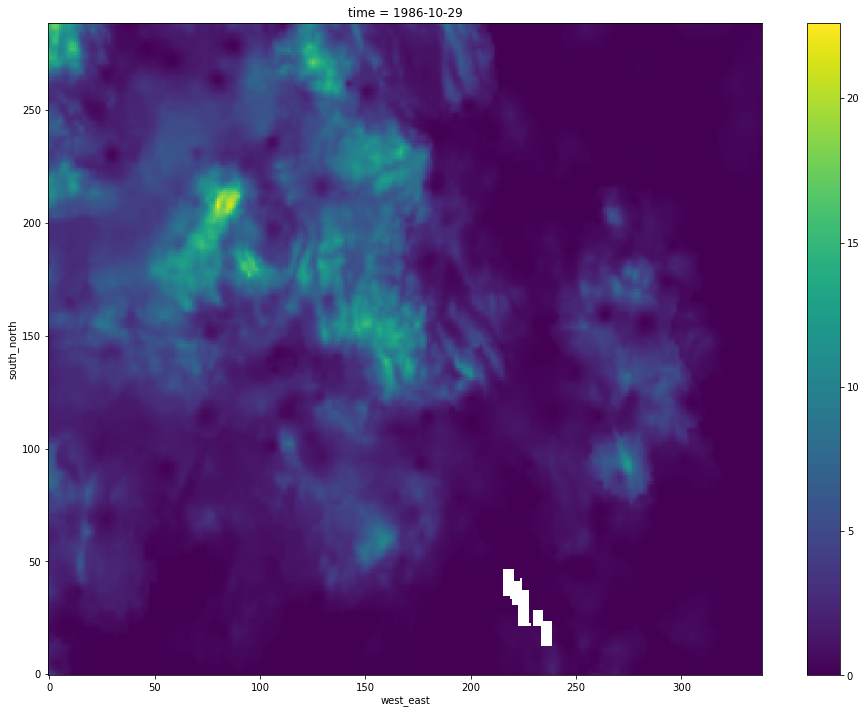

In [15]:
dr_dest.plot(figsize=(16,12))